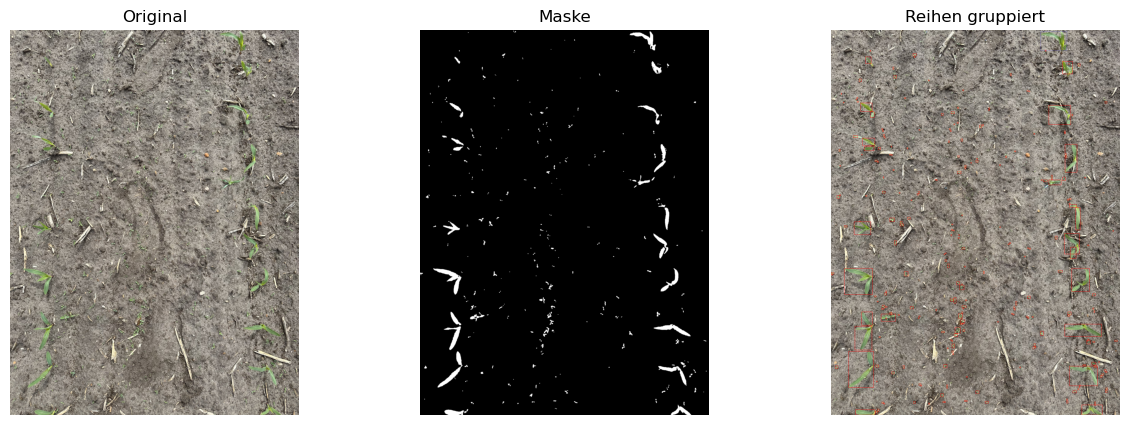

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def group_rectangles_by_row(rects, y_threshold=40):
    rects = sorted(rects, key=lambda r: r[1])  # nach y sortieren
    groups = []
    current_group = []

    for rect in rects:
        x, y, w, h = rect
        if not current_group:
            current_group.append(rect)
        else:
            _, y_prev, _, h_prev = current_group[-1]
            if abs(y - y_prev) < y_threshold:
                current_group.append(rect)
            else:
                groups.append(current_group)
                current_group = [rect]
    if current_group:
        groups.append(current_group)

    return groups

def detect_plant_rows_with_group_highlight(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_clean = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, np.ones((5,5), np.uint8))

    contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rects = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:
            rects.append(cv2.boundingRect(cnt))

    # Gruppenbildung
    groups = group_rectangles_by_row(rects)

    img_annotated = img.copy()
    for group in groups:
        if len(group) >= 3:  # Nur Gruppen mit >= 3 Rechtecken markieren
            for (x, y, w, h) in group:
                cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (0, 0, 255), 2)  # ROT
        else:
            for (x, y, w, h) in group:
                cv2.rectangle(img_annotated, (x, y), (x + w, y + h), (255, 0, 0), 1)  # BLAU

    # Anzeigen
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Maske")
    plt.imshow(mask_clean, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Reihen gruppiert")
    plt.imshow(cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

detect_plant_rows_with_group_highlight('1_dataset/images/2_reihen\IMG_1090.png')
